## Initialisation

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [186]:
cpcp_air_pollution_data = pd.read_csv("./Data/Data.csv")
ncap_funding_data = pd.read_csv("./Data/NCAP_Funding.csv")
state_data = pd.read_csv("./Data/State_Data.csv")

## Spatial Aggregation

#### 1) Which state(consider all the stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [187]:
cpcp_air_pollution_data_state_groupby = cpcp_air_pollution_data.groupby("state")
print(cpcp_air_pollution_data_state_groupby.agg({"PM2.5": "mean"}).sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest PM2.5 value across all years")


Delhi has the highest PM2.5 value across all years


#### 2) Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [188]:
cpcp_air_pollution_data["Timestamp"] = pd.to_datetime(cpcp_air_pollution_data["Timestamp"])
start_date = '2023-01-01'
end_date = '2023-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_year_2023 = cpcp_air_pollution_data.loc[date_mask]
pm_mask = cpcp_air_pollution_data_year_2023["PM2.5"] > 300
print(cpcp_air_pollution_data_year_2023.loc[pm_mask].groupby("state").agg({"PM2.5": "count"}).sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest number of days with PM2.5 greater than 300 in 2023")


Delhi has the highest number of days with PM2.5 greater than 300 in 2023


#### 3)Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

In [189]:
cpcp_air_pollution_data_year_2023_state_std = cpcp_air_pollution_data_year_2023.groupby("state").agg({"PM2.5":"std"})
print(cpcp_air_pollution_data_year_2023_state_std.sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest variance of PM2.5 in 2023")

Delhi has the highest variance of PM2.5 in 2023


#### 4)Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [190]:
start_date = '2020-01-01'
end_date = '2021-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_year_2020_2021 = cpcp_air_pollution_data.loc[date_mask]
cpcp_air_pollution_data_year_2020_2021_state_groupby = cpcp_air_pollution_data_year_2020_2021.groupby("state")
cpcp_air_pollution_data_year_2020_2021_state_lowest_mean = cpcp_air_pollution_data_year_2020_2021_state_groupby.agg({"PM2.5": "mean"}).sort_values("PM2.5", ascending=True).iloc[0].name

print(cpcp_air_pollution_data_year_2020_2021_state_lowest_mean+" has the lowest PM2.5 value across 2020 and 2021")

Mizoram has the lowest PM2.5 value across 2020 and 2021


## Temporal Aggregation

#### 1)Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [191]:
start_date = '2020-08-01'
end_date = '2020-08-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_august_2020 = cpcp_air_pollution_data.loc[date_mask]
index_of_highest_pm_value = cpcp_air_pollution_data_august_2020.loc[:,"PM2.5"].idxmax()
print(cpcp_air_pollution_data_august_2020.loc[index_of_highest_pm_value,'station'] + " has recorded highest PM2.5 value in August 2020")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has recorded highest PM2.5 value in August 2020


#### 2)For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [192]:
winter_start_date = '2018-12-01'
winter_end_date = '2019-02-28'
summer_start_date = '2019-03-01'
summer_end_date = '2019-05-31'
monsoon_start_date = '2019-06-01'
monsoon_end_date = '2019-09-30'

winter_date_mask = (cpcp_air_pollution_data['Timestamp'] >= winter_start_date) & (cpcp_air_pollution_data['Timestamp'] <= winter_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
summer_date_mask = (cpcp_air_pollution_data['Timestamp'] >= summer_start_date) & (cpcp_air_pollution_data['Timestamp'] <= summer_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
monsoon_date_mask = (cpcp_air_pollution_data['Timestamp'] >= monsoon_start_date) & (cpcp_air_pollution_data['Timestamp'] <= monsoon_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")

cpcp_air_pollution_data_winter_2018_2019_kspcb = cpcp_air_pollution_data.loc[winter_date_mask]
cpcp_air_pollution_data_summer_2019_kcpcb = cpcp_air_pollution_data.loc[summer_date_mask]
cpcp_air_pollution_data_monsoon_2019_kspcb = cpcp_air_pollution_data.loc[monsoon_date_mask]

winter_mean = cpcp_air_pollution_data_winter_2018_2019_kspcb.agg({"PM2.5": "mean"})
summer_mean = cpcp_air_pollution_data_summer_2019_kcpcb.agg({"PM2.5": "mean"})
monsoon_mean = cpcp_air_pollution_data_monsoon_2019_kspcb.agg({"PM2.5": "mean"})

if(winter_mean['PM2.5']>summer_mean['PM2.5'] and winter_mean['PM2.5']>monsoon_mean['PM2.5']):
    print("Winter has the highest PM2.5 value")
elif(summer_mean['PM2.5']>winter_mean['PM2.5'] and summer_mean['PM2.5']>monsoon_mean['PM2.5']):
    print("Summer has the highest PM2.5 value")
else:
    print("Monsoon has the highest PM2.5 value")

Winter has the highest PM2.5 value


#### 3)Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

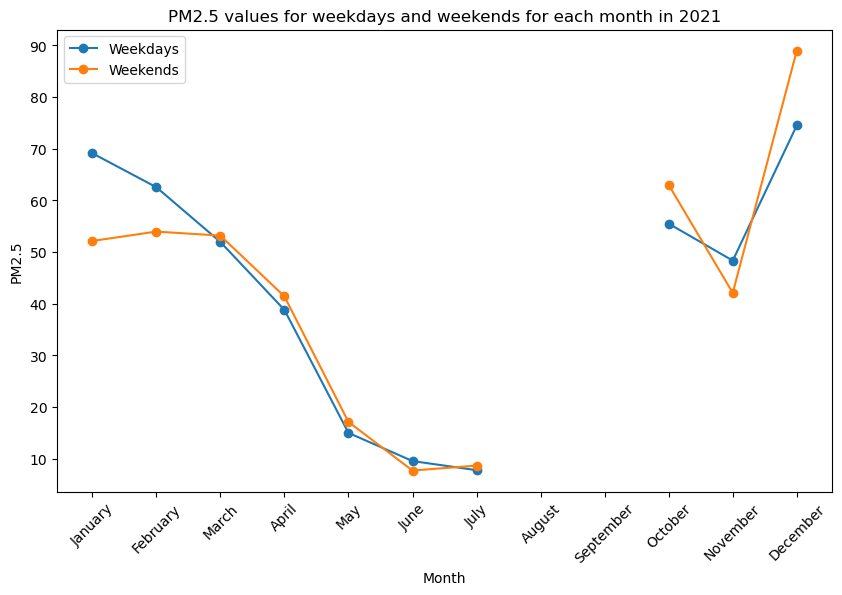

In [193]:
start_date = '2021-01-01'
end_date = '2021-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
cpcp_air_pollution_data_year_2021 = cpcp_air_pollution_data.loc[date_mask].copy()
cpcp_air_pollution_data_year_2021.loc[:, "day_name"] = cpcp_air_pollution_data_year_2021["Timestamp"].dt.day_name().apply(lambda x: "Weekends" if x in ["Saturday", "Sunday"] else "Weekdays")
cpcp_air_pollution_data_year_2021.loc[:, "month"] = cpcp_air_pollution_data_year_2021["Timestamp"].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
cpcp_air_pollution_data_year_2021['month'] = pd.Categorical(cpcp_air_pollution_data_year_2021['month'], categories=month_order, ordered=True)
cpcp_air_pollution_data_year_2021_pm_values_weekdays_and_weekends = cpcp_air_pollution_data_year_2021.groupby(["month", "day_name"],observed=False).agg({"PM2.5": "mean"})
fig, ax = plt.subplots(figsize=(10, 6))
cpcp_air_pollution_data_year_2021_pm_values_weekdays_and_weekends.unstack().plot(kind='line', ax=ax, marker='o')

ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.title("PM2.5 values for weekdays and weekends for each month in 2021")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.legend(["Weekdays", "Weekends"])
plt.show()




## Spatial-Temporal Aggregation

#### 1)For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [194]:
start_date_monsoon = '2022-06-01'
end_date_monsoon = '2022-09-30'
start_date_summer = '2022-03-01'
end_date_summer = '2022-05-31'
date_mask_monsoon = (cpcp_air_pollution_data['Timestamp'] >= start_date_monsoon) & (cpcp_air_pollution_data['Timestamp'] <= end_date_monsoon)
date_mask_summer = (cpcp_air_pollution_data['Timestamp'] >= start_date_summer) & (cpcp_air_pollution_data['Timestamp'] <= end_date_summer)
cpcp_air_pollution_data_monsoon_2022 = cpcp_air_pollution_data.loc[date_mask_monsoon]
cpcp_air_pollution_data_summer_2022 = cpcp_air_pollution_data.loc[date_mask_summer]
cpcp_air_pollution_data_monsoon_2022_state_groupby = cpcp_air_pollution_data_monsoon_2022.groupby("state")
cpcp_air_pollution_data_summer_2022_state_groupby = cpcp_air_pollution_data_summer_2022.groupby("state")
monsoon_mean = cpcp_air_pollution_data_monsoon_2022_state_groupby.agg({"PM2.5": "mean"})
summer_mean = cpcp_air_pollution_data_summer_2022_state_groupby.agg({"PM2.5": "mean"})
percentage_change = ((monsoon_mean - summer_mean) / summer_mean) * 100
percentage_change = percentage_change.abs()
print(percentage_change.idxmax()["PM2.5"]+" has the highest percentage change in PM2.5 values between summer and monsoon in 2022")


Assam has the highest percentage change in PM2.5 values between summer and monsoon in 2022


#### 2)Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

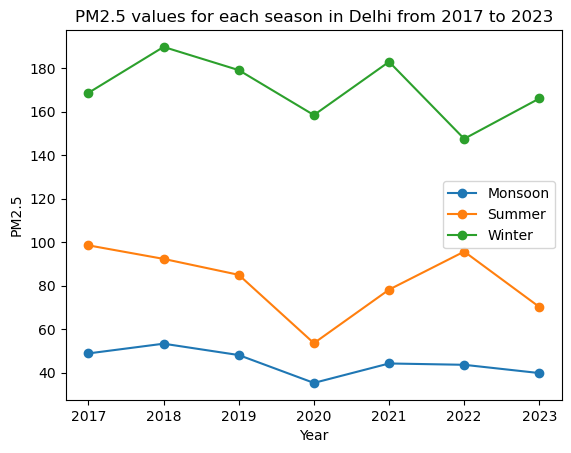

In [195]:

cpcp_air_pollution_data_Delhi_2017_to_2023 = cpcp_air_pollution_data[cpcp_air_pollution_data["state"] == "Delhi"]
cpcp_air_pollution_data_Delhi_2017_to_2023 = cpcp_air_pollution_data_Delhi_2017_to_2023[cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.year.isin(range(2017, 2024))]
cpcp_air_pollution_data_Delhi_2017_to_2023.loc[:, "season"] = cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.month_name().apply(lambda x: "Winter" if x in ["December","January","February"] else "Summer" if x in ["March","April","May"] else "Monsoon" if x in ["June","July","August"] else "NA")
cpcp_air_pollution_data_Delhi_2017_to_2023.loc[:, "year"] = cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.year
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal=cpcp_air_pollution_data_Delhi_2017_to_2023.groupby(["year", "season"]).agg({"PM2.5": "mean"})
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal = cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal[cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.index.get_level_values("season") != "NA"]
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal = cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.unstack()
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.plot(kind='line', marker='o')
plt.title("PM2.5 values for each season in Delhi from 2017 to 2023")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.legend(["Monsoon", "Summer", "Winter"])
plt.show()



The graph shows a dip in pollution levels in 2020, particularly in summer and monsoon, which could be attributed to the COVID-19 lockdowns and the resulting decrease in industrial, transportation, and construction activities. However, winter pollution, despite potential reductions, remained significantly high, highlighting the influence of meteorological factors and agricultural burning.

#### 3)Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

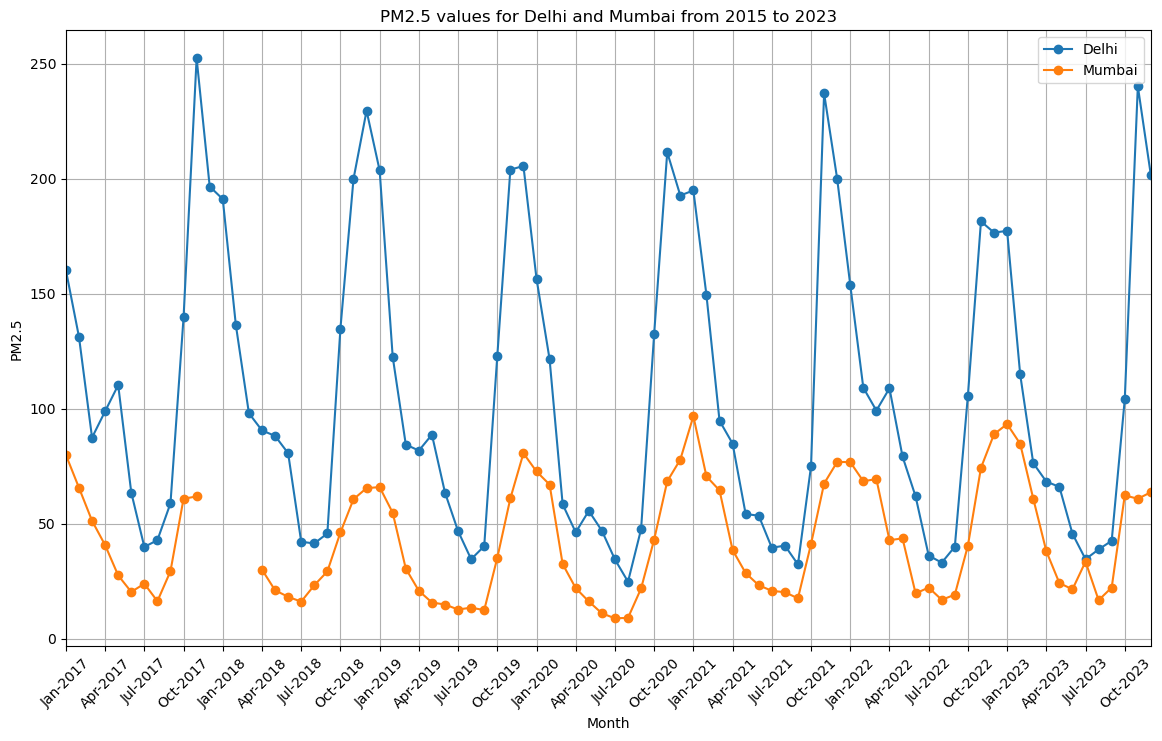

Standard Deviation of PM2.5 for Delhi: 62.975376011853136
Standard Deviation of PM2.5 for Mumbai: 24.5258009141125
Delhi had more fluctuations in PM2.5 levels.


In [196]:
cpcp_air_pollution_data_Delhi_2015_to_2023 = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["city"] == "Delhi") & 
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2015, 2024)))
]
cpcp_air_pollution_data_Mumbai_2015_to_2023 = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["city"] == "Mumbai") & 
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2015, 2024)))
]
numeric_columns = ["PM2.5"]
cpcp_air_pollution_data_Delhi_2015_to_2023_monthly = cpcp_air_pollution_data_Delhi_2015_to_2023.set_index('Timestamp')[numeric_columns].resample('ME').mean()
cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly = cpcp_air_pollution_data_Mumbai_2015_to_2023.set_index('Timestamp')[numeric_columns].resample('ME').mean()
fig, ax = plt.subplots(figsize=(14, 8))
cpcp_air_pollution_data_Delhi_2015_to_2023_monthly['PM2.5'].plot(kind='line', ax=ax, marker='o', label='Delhi')
cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly['PM2.5'].plot(kind='line', ax=ax, marker='o', label='Mumbai')
ax.set_xticks(cpcp_air_pollution_data_Delhi_2015_to_2023_monthly.index[::3])
ax.set_xticklabels(cpcp_air_pollution_data_Delhi_2015_to_2023_monthly.index.strftime("%b-%Y")[::3], rotation=45)
plt.title("PM2.5 values for Delhi and Mumbai from 2015 to 2023")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.show()
std_dev_delhi = cpcp_air_pollution_data_Delhi_2015_to_2023_monthly['PM2.5'].std()
std_dev_mumbai = cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly['PM2.5'].std()
print(f"Standard Deviation of PM2.5 for Delhi: {std_dev_delhi}")
print(f"Standard Deviation of PM2.5 for Mumbai: {std_dev_mumbai}")
if std_dev_delhi > std_dev_mumbai:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

## Population Based

#### 1)Which state in India has the highest number of monitoring stations relative to its population? 

In [197]:
cpcp_air_pollution_data_population_data = cpcp_air_pollution_data.merge(state_data,left_on="state",right_on="State")
cpcp_air_pollution_data_population_data.drop('State', axis=1, inplace=True)
cpcp_air_pollution_data_population_data_groupby = cpcp_air_pollution_data_population_data.groupby("state")
cpcp_air_pollution_data_population_data_groupby_station_population = cpcp_air_pollution_data_population_data_groupby.agg({"station": "count", "Population": "mean"})
cpcp_air_pollution_data_population_data_groupby_station_population["stations_per_population"] = cpcp_air_pollution_data_population_data_groupby_station_population["station"] / cpcp_air_pollution_data_population_data_groupby_station_population["Population"]
print(cpcp_air_pollution_data_population_data_groupby_station_population["stations_per_population"].idxmax()+" has the highest number of stations per population")


Chandigarh has the highest number of stations per population


#### 2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

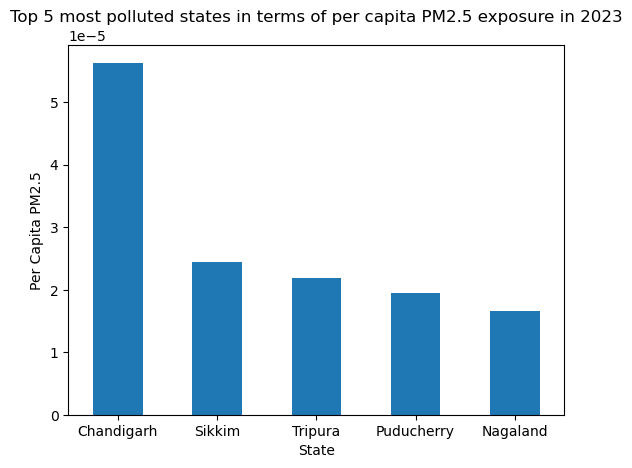

In [198]:
cpcp_air_pollution_data_population_data_2023 = cpcp_air_pollution_data_population_data[cpcp_air_pollution_data_population_data["Timestamp"].dt.year == 2023]
cpcp_air_pollution_data_population_data_2023_groupby = cpcp_air_pollution_data_population_data_2023.groupby("state")
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm = cpcp_air_pollution_data_population_data_2023_groupby.agg({"PM2.5": "mean", "Population": "mean"})
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["per_capita_pm"] = cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["PM2.5"] / cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["Population"]
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm = cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm.sort_values("per_capita_pm", ascending=False).head(5)
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["per_capita_pm"].plot(kind='bar')
plt.title("Top 5 most polluted states in terms of per capita PM2.5 exposure in 2023")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5")
plt.xticks(rotation=0)
plt.show()

#### 3)Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.


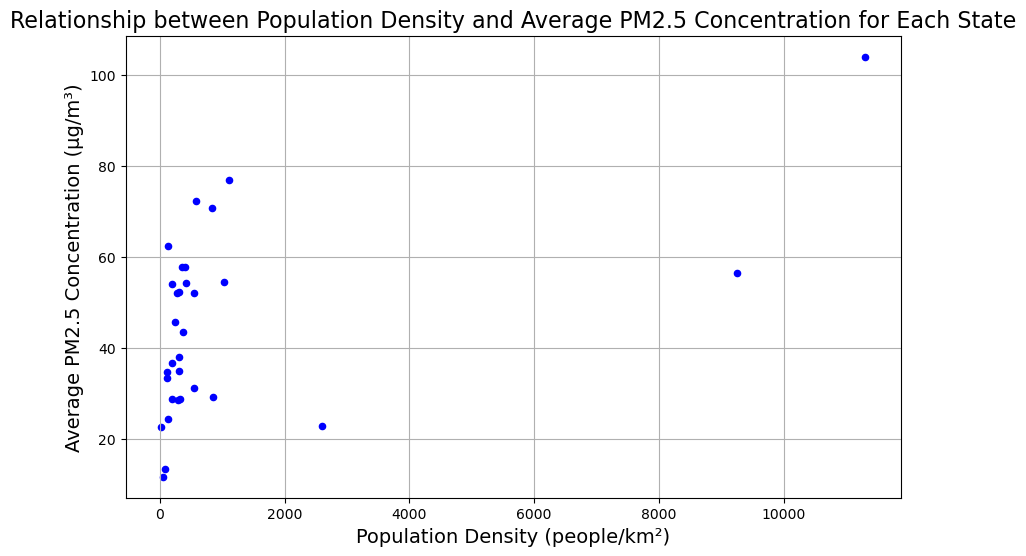

In [206]:
cpcp_air_pollution_data_population_data_groupby_population_density = cpcp_air_pollution_data_population_data_groupby.agg({
    "Population": "mean",
    "Area (km2)": "mean"
})
cpcp_air_pollution_data_population_data_groupby_population_density["population_density"] = cpcp_air_pollution_data_population_data_groupby_population_density["Population"] / cpcp_air_pollution_data_population_data_groupby_population_density["Area (km2)"]
pm25_avg = cpcp_air_pollution_data_population_data_groupby.agg({"PM2.5": "mean"}).rename(columns={"PM2.5": "avg_PM2.5"})
merged_data = cpcp_air_pollution_data_population_data_groupby_population_density[["population_density"]].merge(
    pm25_avg, left_index=True, right_index=True
)
merged_data.plot(kind='scatter', x='population_density', y='avg_PM2.5', figsize=(10, 6), color='blue')
plt.title("Relationship between Population Density and Average PM2.5 Concentration for Each State", fontsize=16)
plt.xlabel("Population Density (people/km²)", fontsize=14)
plt.ylabel("Average PM2.5 Concentration (μg/m³)", fontsize=14)
plt.grid(True)
plt.show()
